In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Meachine learning/Project/clustering/Country-data.csv")

In [ ]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Định nghĩa các trường dữ liệu
- country : Tên các quốc gia
- child_mort: Tỷ lệ tử vong trẻ em dưới 5 tuổi trên 1000 ca sinh sống
- exports: Xuất khẩu hàng hóa và dịch vụ bình quân đầu người. Tính bằng % tuổi trong GDP bình quân đầu người
- health: Tổng chi tiêu y tế bình quân đầu người. Tính bằng % tuổi trong GDP bình quân đầu người
- imports: Nhập khẩu hàng hóa và dịch vụ bình quân đầu người. Tính bằng % tuổi trong GDP bình quân đầu người
- income:Thu nhập ròng mỗi người
- inflation:Đo lường tốc độ tăng trưởng hàng năm của Tổng GDP
- life_expec:Số năm trung bình mà một đứa trẻ mới sinh có thể sống nếu mô hình tử vong hiện nay được khắc phục
- total_fer:Số con mà mỗi phụ nữ sẽ sinh ra nếu tỷ suất sinh theo độ tuổi hiện nay giữ nguyên
- gdpp:GDP bình quân đầu người. Được tính bằng Tổng GDP chia cho tổng dân số.

# Kiểm tra dữ liệu

### Kiểm tra lỗi trùng lặp

In [ ]:
data.duplicated().sum()

0

- Không có bất kì một thực thể nào bị trùng lặp trong tập dữ liệu trên.



### Kiểm tra missing value

In [ ]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Trong tập dữ liệu trên không hề có bất kì một bản ghi nào bị thiếu dữ liệu

# Exploratory Data Analysis (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- Dữ liệu không bị missing value
- Các trường dữ liệu đều không có vấn đề về kiểu dữ liệu

<ipython-input-9-e262b8c8d8fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap= 'magma',cbar = False, annot=True)


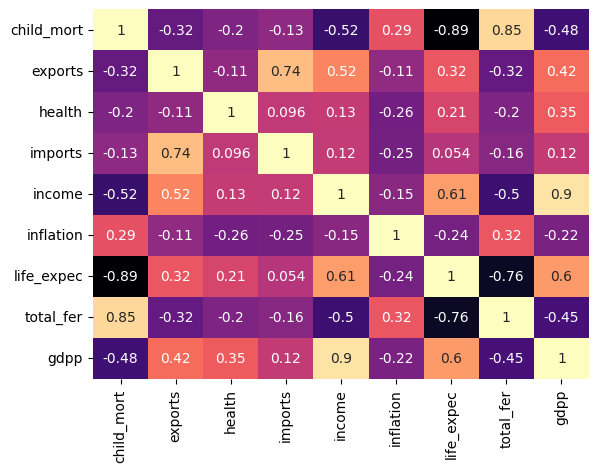

In [ ]:
sns.heatmap(data.corr(), cmap= 'magma',cbar = False, annot=True)
plt.show()

In [ ]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


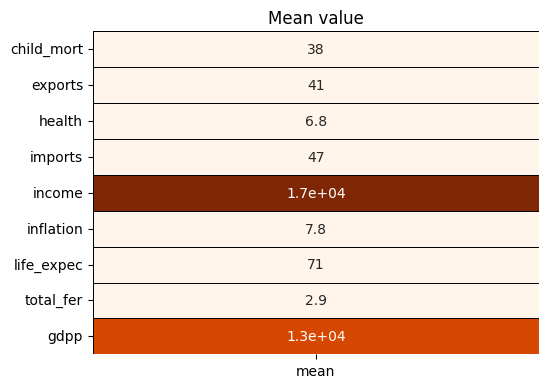

In [ ]:
fix,ag = plt.subplots(nrows = 1 , ncols = 1)
plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'Oranges', annot = True, linecolor = 'black',linewidths = 0.4,cbar = False)
plt.title("Mean value")
fix.tight_layout(pad = 4)

### distribution of data

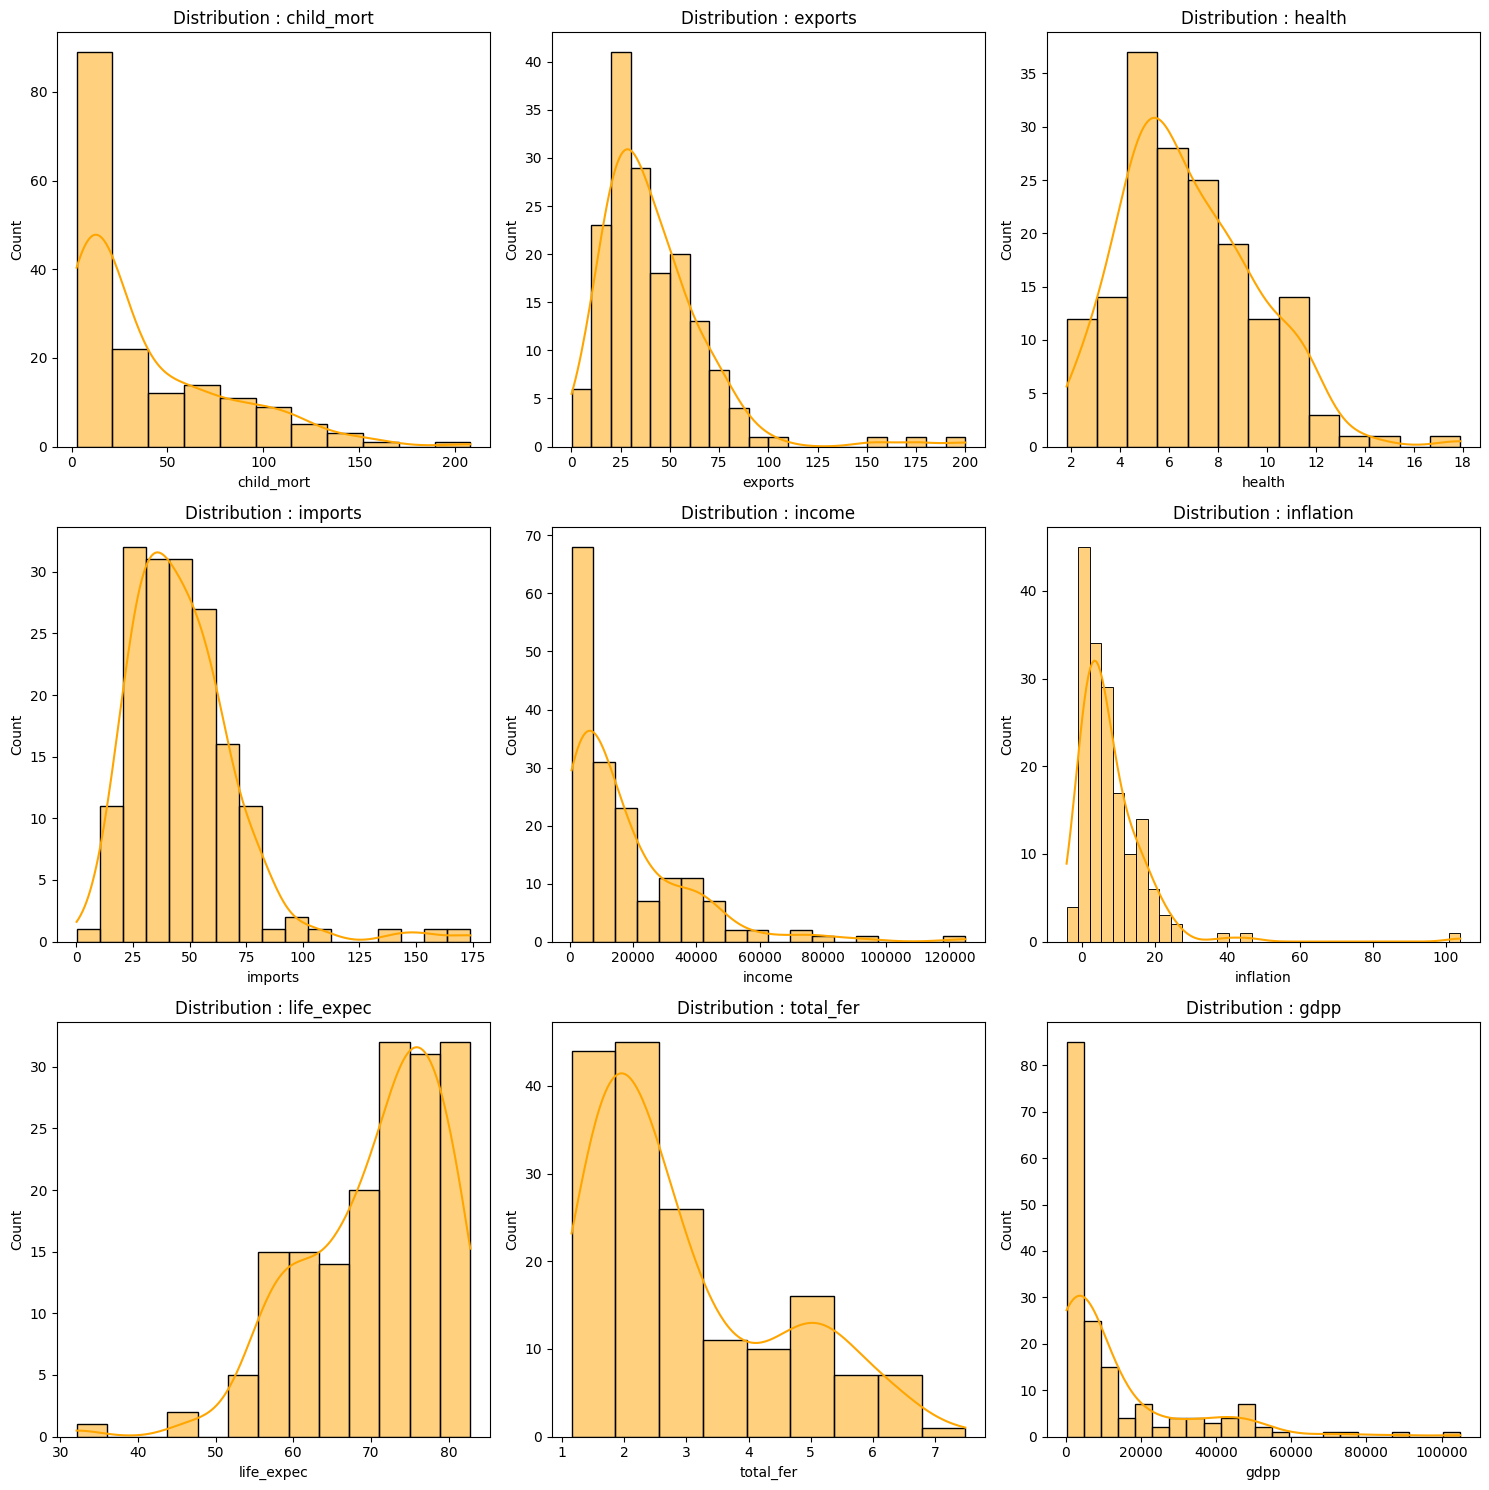

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(len(data.columns[1:])):
    sns.histplot(data[data.columns[i+1]], color='orange', kde=True, ax=ax[i//3, i%3])
    title = 'Distribution : ' + data.columns[i+1]
    ax[i//3, i%3].set_title(title)
plt.tight_layout()
plt.show()

- Có thể thấy tập dữ liệu có khá nhiều dữ liệu bị lệch đa số các dữ liệu bị lệch phải.
- tập dữ liệu life_expec bị lệch về phía bên trái

### Kiểm tra một số quốc gia có thu nhập thấp, trung bình, cao thông qua GDP của các quốc gia

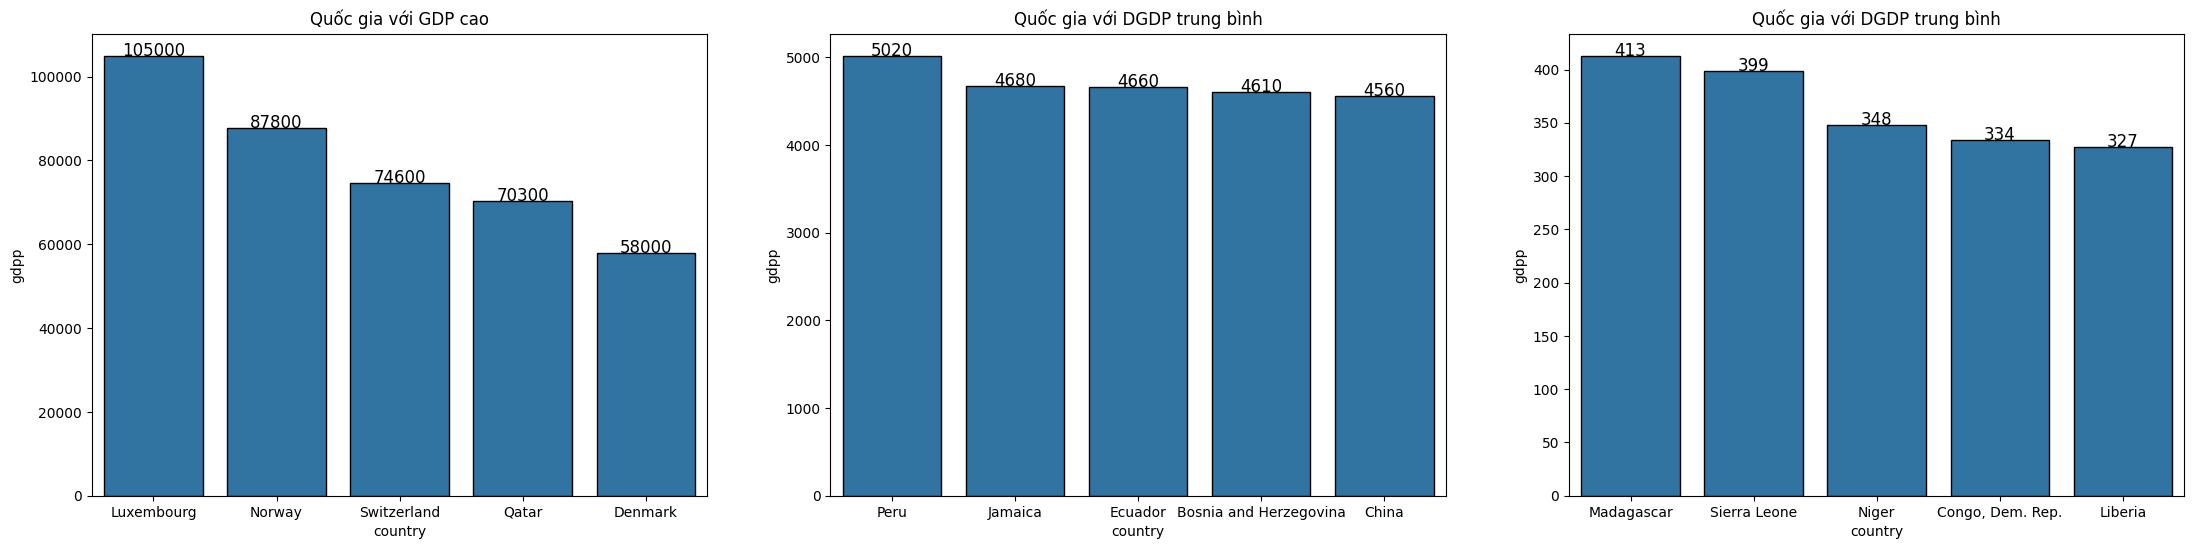

In [ ]:
fig = plt.subplots(nrows =1, ncols = 3, figsize = (27,6))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country', y = 'gdpp', data = data.sort_values(ascending = False, by = 'gdpp').iloc[:5], edgecolor = 'black')
plt.title("Quốc gia với GDP cao")
for rect in ax.patches:
  ax.text(rect.get_x() + rect.get_width()/2 , rect.get_height(), int(rect.get_height()), horizontalalignment = 'center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country', y = 'gdpp', data = data.sort_values(ascending= False, by = 'gdpp').iloc[81:86], edgecolor = 'black')
plt.title('Quốc gia với DGDP trung bình')
for rect in ax.patches:
  ax.text(rect.get_x() +  rect.get_width()/2, rect.get_height(), int(rect.get_height()), horizontalalignment = 'center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country', y = 'gdpp', data = data.sort_values(ascending= False, by = 'gdpp').iloc[161:166], edgecolor = 'black')
plt.title('Quốc gia với DGDP trung bình')
for rect in ax.patches:
  ax.text(rect.get_x() +  rect.get_width()/2, rect.get_height(), int(rect.get_height()), horizontalalignment = 'center', fontsize = 12)

- Có thể thấy các quốc gia có GDP cao nhất tập trung chủ yếu ở Châu ÂU, Ngoài ra có Qatar thuộc vùng Trung Đông nơi có dữ trự dầu mỏ khổng lồ. Các quốc gia có nguồn thu nhật thấp và trung bình và thấp tập trung chủ yếu ở Nam mĩ, Châu Phi và Châu Á.
**Note*:
  - Thu nhập trung bình: 4700$ - 5000$

### Kiểm tra tỷ lệ tử vong ở trẻ em

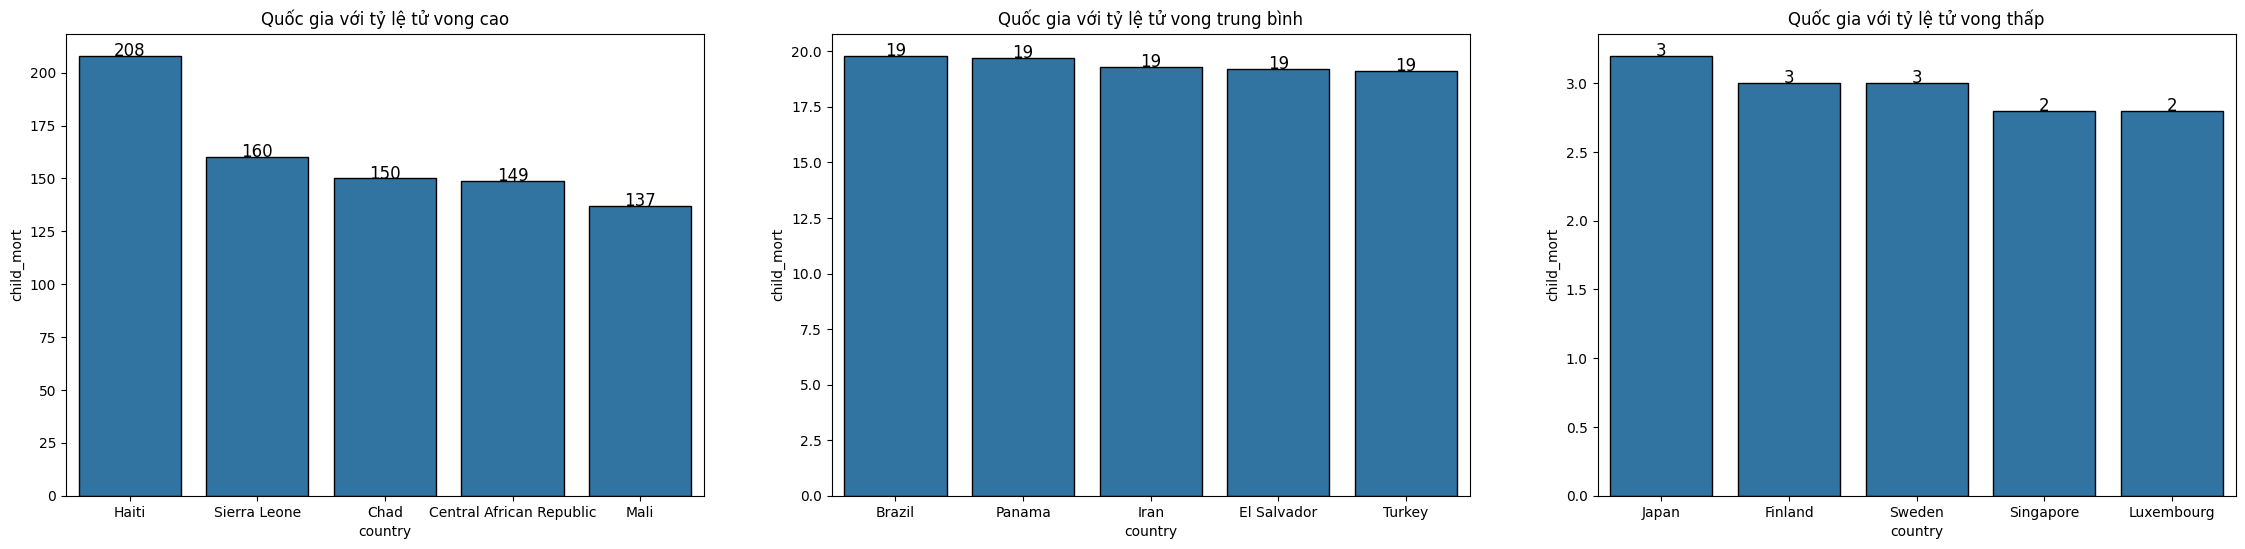

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (28,6))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],edgecolor = 'black');
plt.title('Quốc gia với tỷ lệ tử vong cao')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],edgecolor = 'black');
plt.title('Quốc gia với tỷ lệ tử vong trung bình')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],edgecolor = 'black');
plt.title('Quốc gia với tỷ lệ tử vong thấp')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

- Có thể thấp rằng các quốc gia có tỷ lệ tử vong ở trẻ em cao nhất thuộc về Châu Phi khi kinh tế chưa phát triển người dân không có cơ sở vật chất tốt.
- Nhóm các quốc gia có nền kinh tế phát triển tốt như Singapore, Japan có tỷ lệ tử vong ở trẻ em thấp.

### KIểm tra chi tiêu cho sức khỏe theo các quốc gia

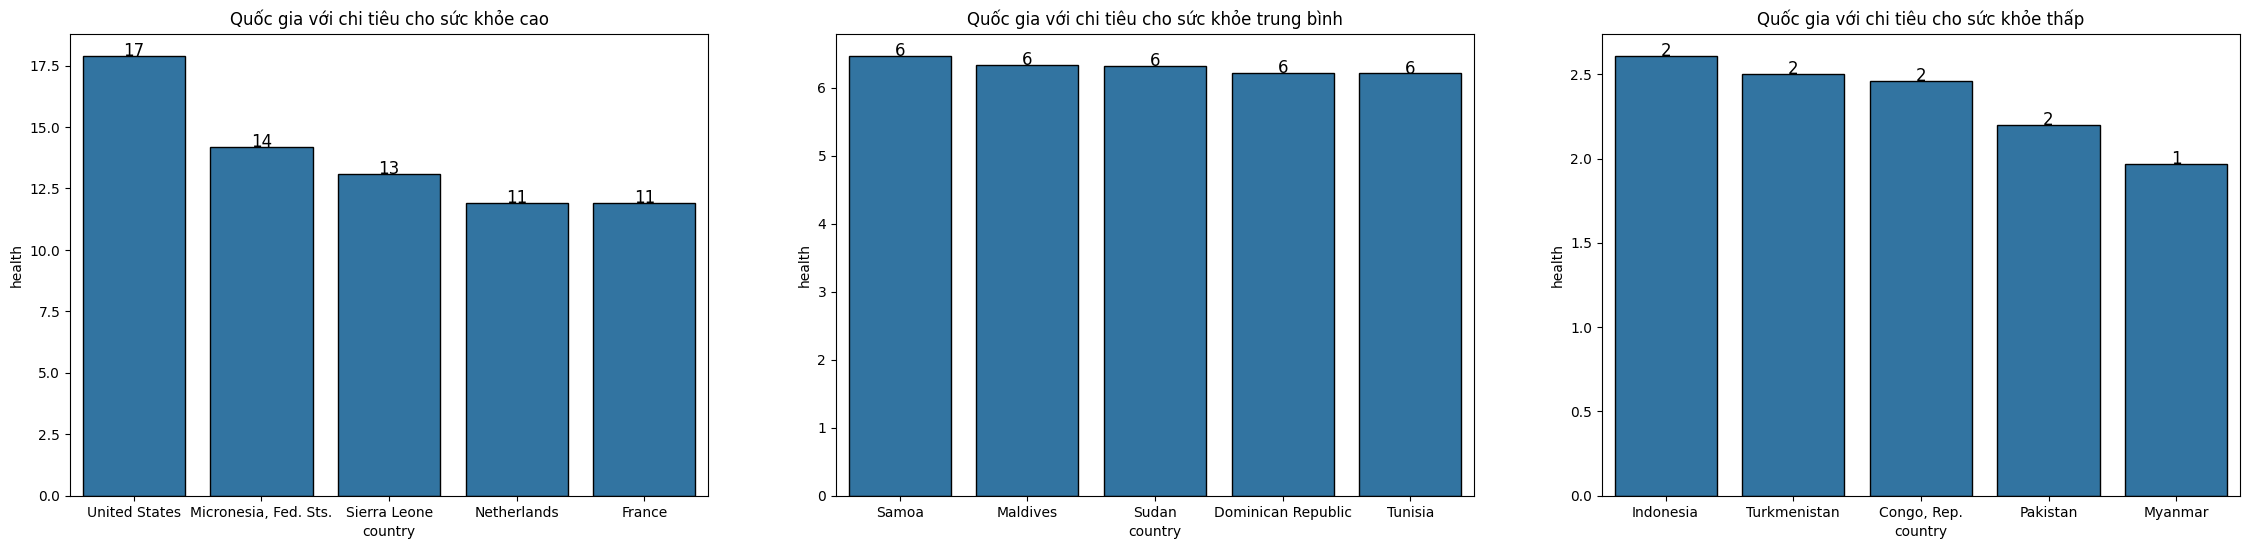

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (28,6))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[:5],edgecolor = 'black');
plt.title('Quốc gia với chi tiêu cho sức khỏe cao')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[81:86],edgecolor = 'black');
plt.title('Quốc gia với chi tiêu cho sức khỏe trung bình')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[161:166],edgecolor = 'black');
plt.title('Quốc gia với chi tiêu cho sức khỏe thấp')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

Các biểu đồ cho thấy hầu như sự chênh lệch giữa GDP của các quốc gia dẫn đến tất cả các vấn đề như chi tiêu, tỷ lệ tử vong của trẻ em,...
- Các quốc gia có nguồn thu nhập cao thường hầu hết ít xảy ra các vấn đề hơn các quốc gia có thu nhập thấp.

### Kiểm tra ourlier của các thuộc tính

<ipython-input-16-85938a1f85f5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)
<ipython-input-16-85938a1f85f5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)
<ipython-input-16-85938a1f85f5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


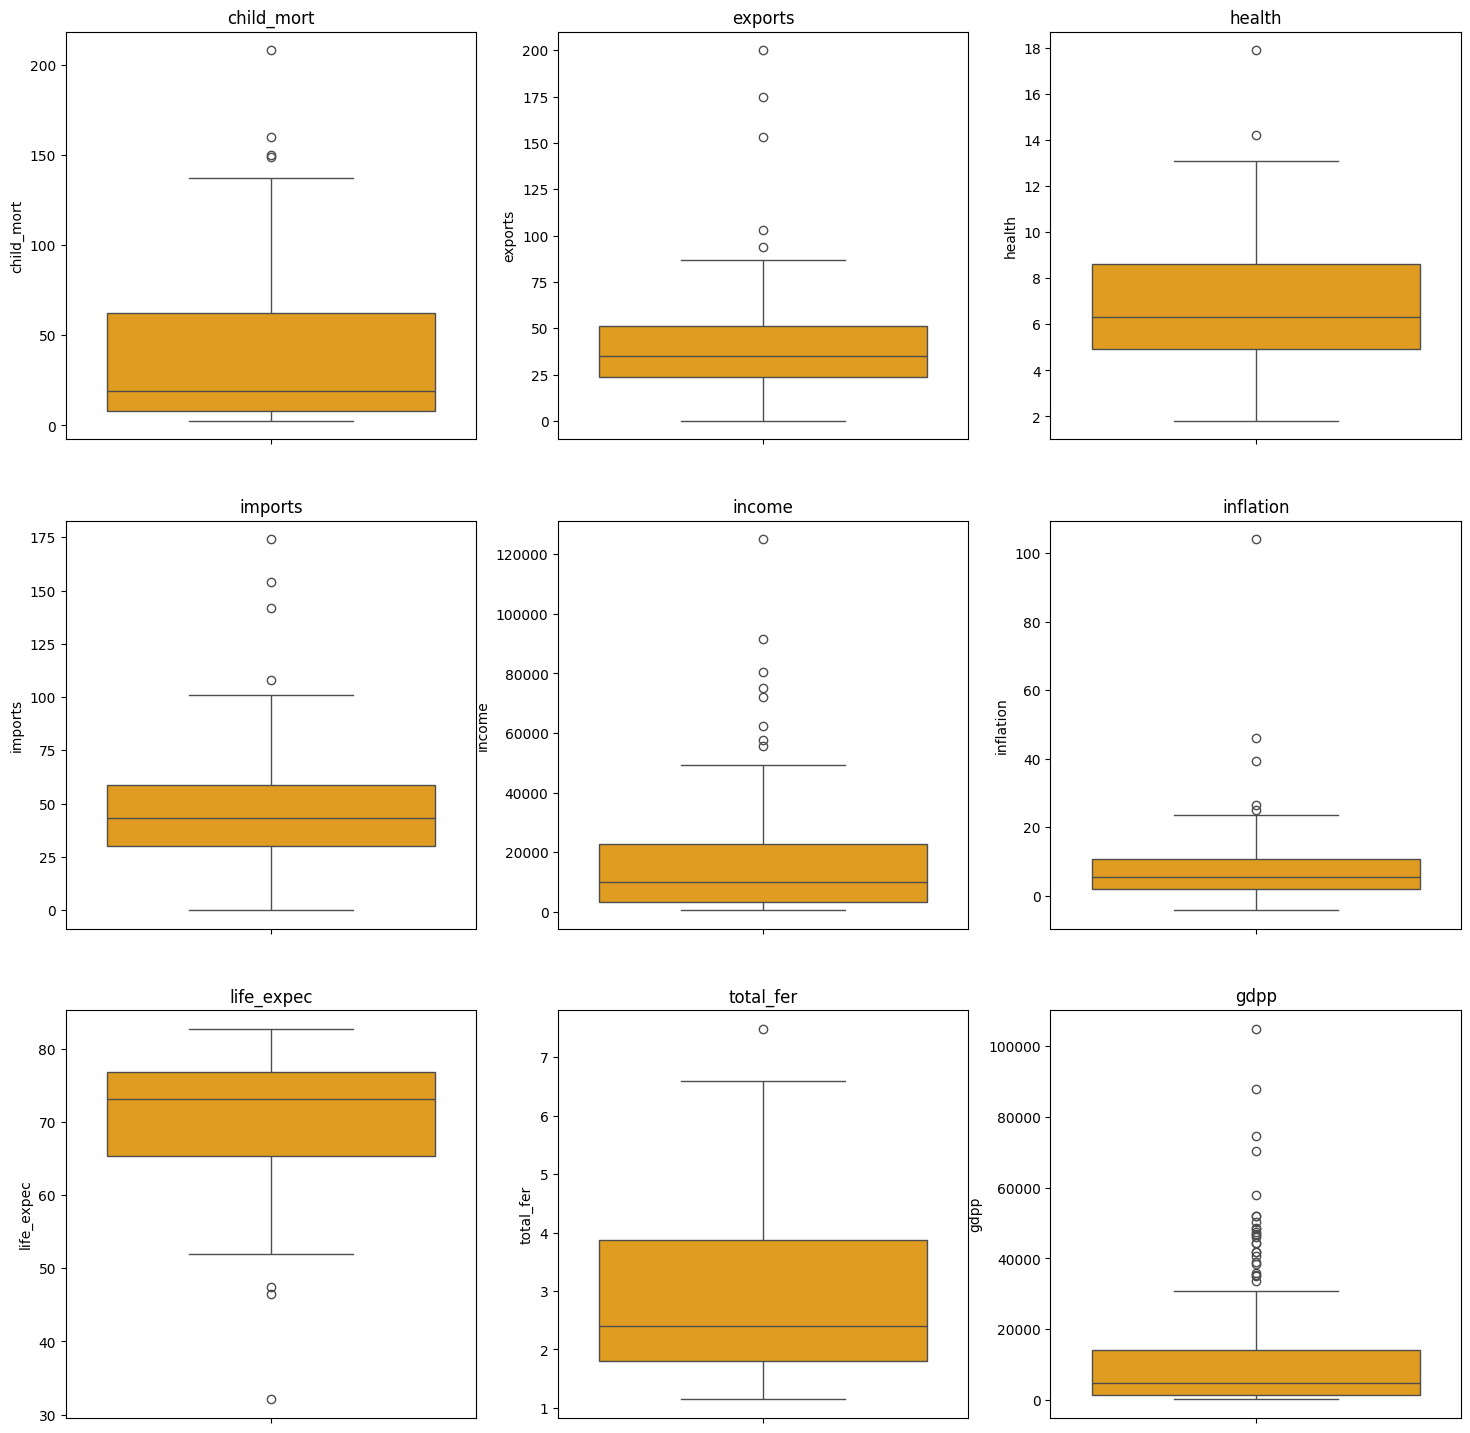

In [ ]:
fig = plt.subplots(nrows = 1 , ncols = 3, figsize = (18,18))
for i in range(len(data.columns[1:])):
  plt.subplot(3,3,i+1)
  ax = sns.boxplot(data[data.columns[i+1]], color='orange')
  plt.title(data.columns[i+1])
plt.show()

Nhận xét:
- Có thể thấy các trường dữ liệu đều còn các giá trị ngoại lai nhưng số lượng các giá trị này đều không hề nhiều và đáng kể.

### Tương quan giữa các thuộc tính

<ipython-input-17-ee0664ec2362>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = 'Oranges',annot = True)


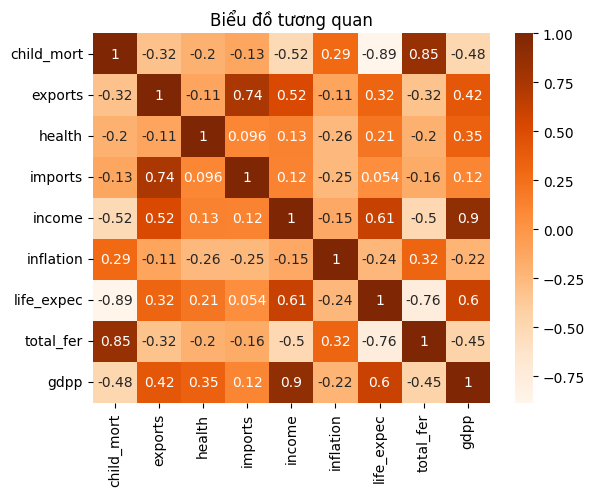

In [ ]:
sns.heatmap(data.corr(), cmap = 'Oranges',annot = True)
plt.title("Biểu đồ tương quan")
plt.show()

Biểu đồ cho ta thấy sự tương quan giữa các thuộc tính với nhau. Đa số các thuộc tính đều có sự tương quan khá thấp với nhau chỉ có một vài thuộc tính có được sự liên quan mạnh mẽ với nhau(> 85%) như:
- child_mort tương quan mạnh với life_expec và total_fer.
- imcome với gdpp

### Tóm kêt EDA
- Qua những các biểu đồ trực quan hóa dữ liệu có thể thấy các quốc gia thuộc nhóm có GDP thấp tập chung chủ yếu ở Châu Phi và Nam Mĩ. Các quốc gia này dẫn đầu trong nhóm các nước có tuổi thọ thấp, tỷ lệ tử vong ở trẻ em cao.
    + Trong đó hati nổi bật là quốc gia có tỷ lệ trẻ em tử vong cao nhất.
- Và các quốc gia có GDP thấp và trung bình thuộc các khu vực như Châu Á, Châu Phi và Nam mĩ là các quốc gia có tỷ lệ chi tiêu cho y tế khá thấp.
- Ngoài ra ta có thể thấy các dữ liệu có khá ít ourlier và các thuộc tính dữ liệu có sự tương quan khá thấp với nhau.
=> Thấy được sự ảnh hưởng liên quan giữ thu nhập bình quân đầu người với tỷ lệ sinh, mức chi tiêu cho y tế và tuổi thọ bình quân của người dân mỗi quốc gia.


# Buimodel

In [ ]:
 from sklearn.cluster import KMeans

### K-mean

Trong bài viết này tôi sẽ sử dụng 2 phương pháp để so sánh số cụm cần được chia trên tập dữ liệu
- Phương pháp khuỷu tay: Đây là phương pháp vẽ tổng sai số bình phương cho một phạm vi giá trị của k. Nếu biểu đồ này trông giống như một cánh tay thì k là giá trị giống với khuỷu tay được chọn. Từ giá trị khuỷu tay này, tổng các giá trị bình phương (quán tính) bắt đầu giảm theo kiểu tuyến tính và do đó được coi là giá trị tối ưu.
- Phương pháp tính điểm Silhouette: Đây là phương pháp đánh giá chất lượng của các cụm về mức độ các điểm dữ liệu được phân cụm với các điểm dữ liệu khác tương tự nhau như thế nào. Điểm này được tính bằng công thức khoảng cách và giá trị k có điểm cao nhất được chọn để lập mô hình.

In [ ]:
df = data.drop(columns = ['country']).values

##### Kiểm tra số cụm cần thiết để phân chia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

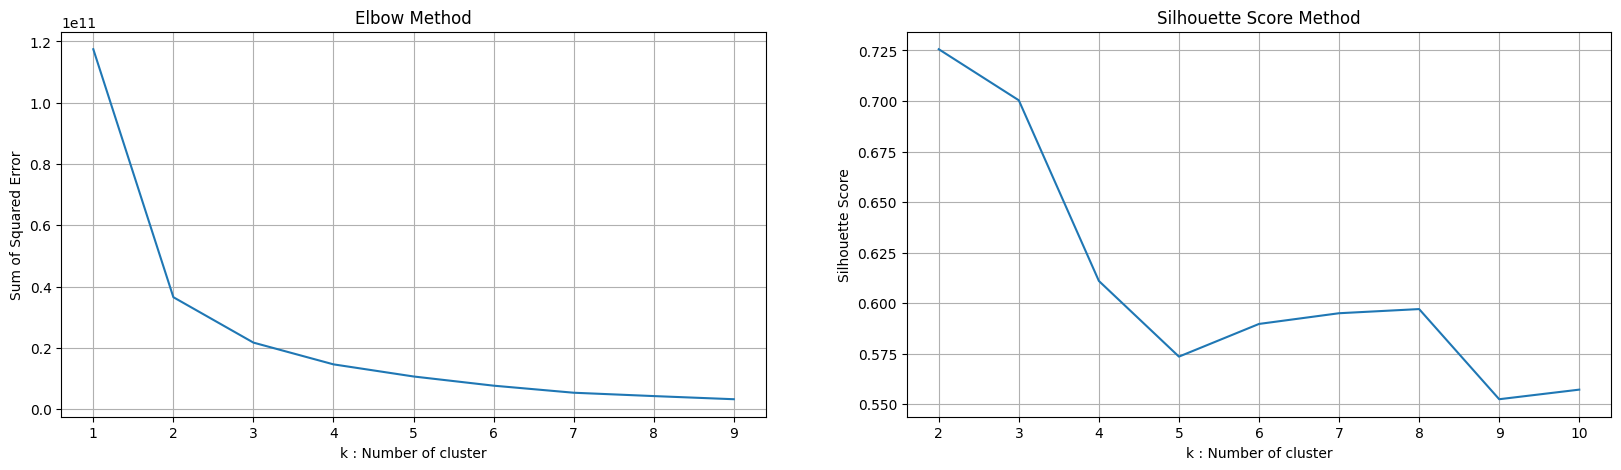

In [ ]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
plt.subplot(1,2,1)
for k in range(1,10):
  Kmeans =   KMeans(n_clusters = k, max_iter = 1000).fit(df)
  sse[k] = Kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    Kmeans = KMeans(n_clusters = k).fit(df)
    labels = Kmeans.labels_
    sil.append(silhouette_score(df, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

Ta có thể thấy với số cụm bằng 4 là phù hợp nhất với tập dữ liệu trên.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state= 50)
kmeans.fit(df)
print(f' Labels: {kmeans.labels_}')

 Labels: [1 1 1 1 0 0 1 2 2 1 0 0 1 0 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 0 1 1 1
 1 1 1 1 0 0 0 2 1 1 1 1 0 1 0 1 2 2 1 1 1 2 1 0 1 1 1 1 1 1 0 2 1 1 1 1 2
 0 2 1 2 1 0 1 1 2 1 1 0 1 1 1 0 0 3 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 0 1 1 3 0 1 1 1 1 1 0 0 3 0 0 1 1 0 1 1 0 1 2 0 0 1 1 0 0 1 1 1 1 2 2 1 1
 1 1 1 1 1 0 1 1 1 2 2 2 0 1 1 0 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_labeled=pd.concat([data,pd.Series(kmeans.labels_,name='label')],axis=1)  #I take the initial dataset:
#the one that it wasn't scaled
df_labeled

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


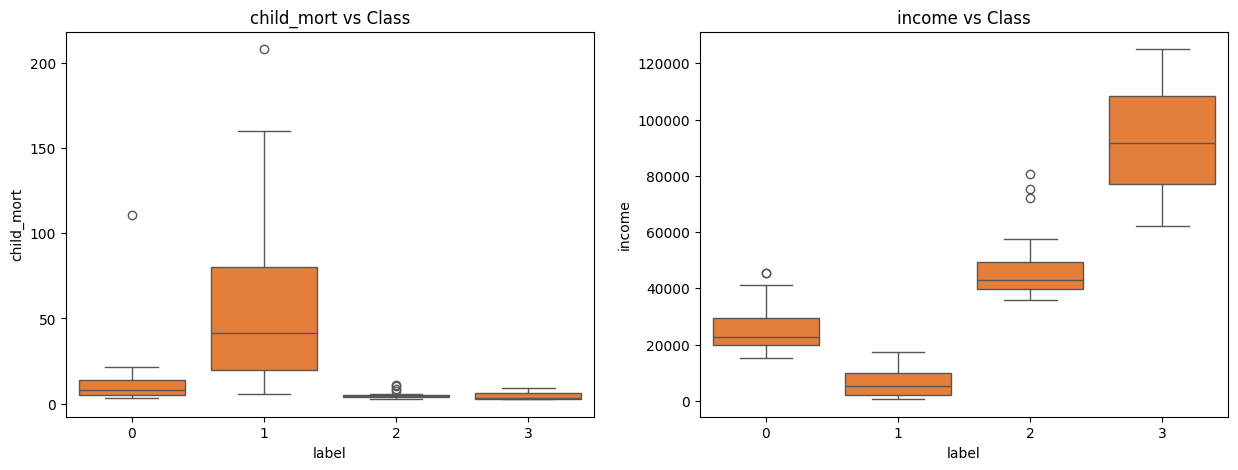

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'label', y = 'child_mort', data  = df_labeled, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'label', y = 'income', data  = df_labeled, color = '#FF781F');
plt.title('income vs Class')

plt.show()

Theo như icome có thể thấy với lables:
- 0 với 2: có thể cần sự giúp đỡ
- 1: Cần giúp đỡ:
- 3: Không cần sự giúp đỡ

In [ ]:
df_labeled.loc[(df_labeled['label'] == 0) | (df_labeled['label'] == 2), 'label'] = 'Might Need Help'
df_labeled['label'].loc[df_labeled['label'] == 1] = 'Help Needed'
df_labeled['label'].loc[df_labeled['label'] == 3] = 'No Help Needed'

fig = px.choropleth(df_labeled[['country','label']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df_labeled['label'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')


<ipython-input-61-24e6cf454dde>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-24e6cf454dde>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- Qua biểu đồ thể hiện các sự giúp đỡ có thể thấy khá ít vùng không cần sự giúp đỡ kể cả các quốc gia như mĩ và canada.Chỉ có duy nhất na uy là quốc gia không cần sự giúp đỡ.
- Các quốc gia ở Châu âu và bắc mĩ là những quốc gia có nền kinh mạnh là nhóm thuộc có thể cần sự giúp đỡ.
- Còn lại các quốc gia ở Châu mĩ và Châu phi là các quốc gia rất cần sự giúp đỡ

### Density-Based Clustering - Phân cụm dựa trên mật độ

- **DBSCAN Clustering** là một thuật toán phân cụm dựa trên mật độ sử dụng cho học không giám sát.

- Nó giúp giải quyết các vấn đề của phân cụm **K-Means** với dữ liệu lồng nhau và dữ liệu có số chiều cao.

- Thuật ngữ chính bao gồm **điểm trung tâm** (core point), **điểm không phải trung tâm** (non-core point), và **nhiễu** (noise/outliers).

- Có hai siêu tham số quan trọng: **minPts** và **Epsilon**.

- Quá trình phân cụm bắt đầu với việc chọn một điểm ngẫu nhiên và kiểm tra các điểm xung quanh nó.

- Nếu khu vực này có đủ số lượng điểm dữ liệu (**minPts**), điểm được coi là một điểm trung tâm và mở rộng phân cụm.

- Các điểm không phải trung tâm vẫn là một phần của phân cụm nhưng không mở rộng phân cụm.

- Giá trị **minPts** thường được chọn tùy thuộc vào số chiều dữ liệu, trong khi giá trị **Epsilon** thường được xác định bằng cách sử dụng đồ thị khoảng cách k từ mô hình **KNN**.

- Điểm nhiễu là các điểm không thuộc bất kỳ phân cụm nào.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

##### Chuẩn hóa lại dữ liệu

In [ ]:
std = MinMaxScaler()
X_std = std.fit_transform(df)

##### Tìm kiếm eps và xác định số láng giềng gần

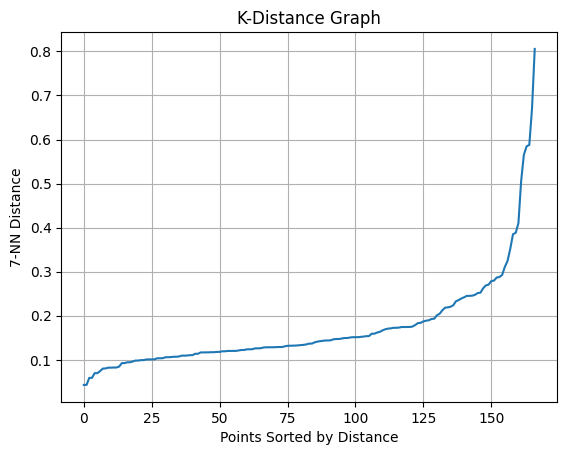

In [ ]:
knn = NearestNeighbors(n_neighbors = 10)
model = knn.fit(X_std)
distances, indices = knn.kneighbors(X_std)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

- Ở đây ta thấy min_samples = n_eighbors + 1
- eps = 0.29

In [ ]:
db = DBSCAN(eps = 0.29, min_samples = 11).fit(X_std)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

Number of Clusters :  1
Number of Outliers :  23


Ta thấy phương pháp phân cụm DBSCAN ở đây là không hợp lý vì số cụm là 1. Vì thế ở đây ta không nên sử dụng phương pháp này cho tập dữ liệu này vì không phù hợp train trên toàn bộ dữ liệu

### Thực hành phân cụm phân cấp

- Hierarchical Clustering là một thuật toán dựa trên khoảng cách được sử dụng cho các bài toán học không giám sát.

- Nó phát triển cấu trúc phân cấp của các cụm dữ liệu dưới dạng một cây gọi là dendrogram. Trong bài toán này, chúng ta sẽ sử dụng Agglomerative Clustering, một phương pháp từ dưới lên, mà lần đầu tiên coi tất cả các điểm dữ liệu là các cụm rồi sau đó gộp chúng lại với nhau dựa trên khoảng cách như sau:
    - Ban đầu, tất cả các điểm được coi là các cụm.
    - Sau đó, các cụm gần nhau bắt đầu gộp lại thành cụm mới.
    - Cụm kết hợp này sau đó được so sánh với các cụm khác và cụm gần nhất sẽ được gộp.
    - Quá trình này tiếp tục cho đến khi một cụm lớn duy nhất được tạo ra.
    - Quá trình này của việc tạo ra các cụm sau đó có thể được xem qua dendrogram. Từ đó, chúng ta chọn số lượng cụm bằng cách xác định số lượng việc gộp cụm ở giai đoạn trước cuối. Khoảng cách giữa các cụm càng xa hơn thì độ dài của các đoạn thẳng dọc càng cao.
    - Để chọn số lượng cụm, chúng ta đặt một ngưỡng và đếm số đường thẳng đứng nằm phía trên ngưỡng đó. Số đường thẳng đứng này sẽ là số lượng cụm. Các phương pháp khác như Phương pháp Điểm Silhouette và Phương pháp Elbow cũng có thể được sử dụng.
    - Đối với Agglomerative Clustering, có 2 siêu tham số quan trọng:
      - linkage: Có nhiều phương pháp kết nối khác nhau cho các cụm như Single, Centroid, Average, v.v.
      - affinity: Đây là công thức khoảng cách so sánh khoảng cách trước khi gộp các cụm.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

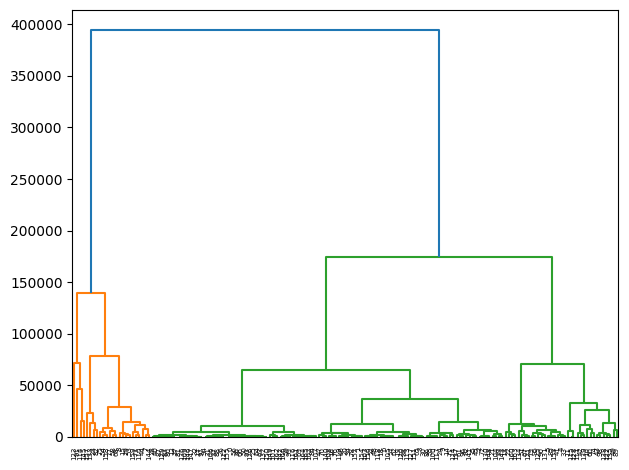

In [ ]:
linkage_data = linkage(df, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

Ở đây ta sẽ mặc định chọn số cụm là 3 vì ta sẽ chia các quốc gia thành 3 nhóm cần sự giúp đỡ, không cần sự giúp đỡ và có khả năng cần sự giúp đỡ

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(df)

pred_agc = pd.Series(hierarchical_cluster.labels_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



- Vì không viết các giá trị của từng cụm đại diện cho vị trí gì vì thế ta cần vẽ để có thể xác định ý nghĩa giá trị con số đại diện cho từng cụm.

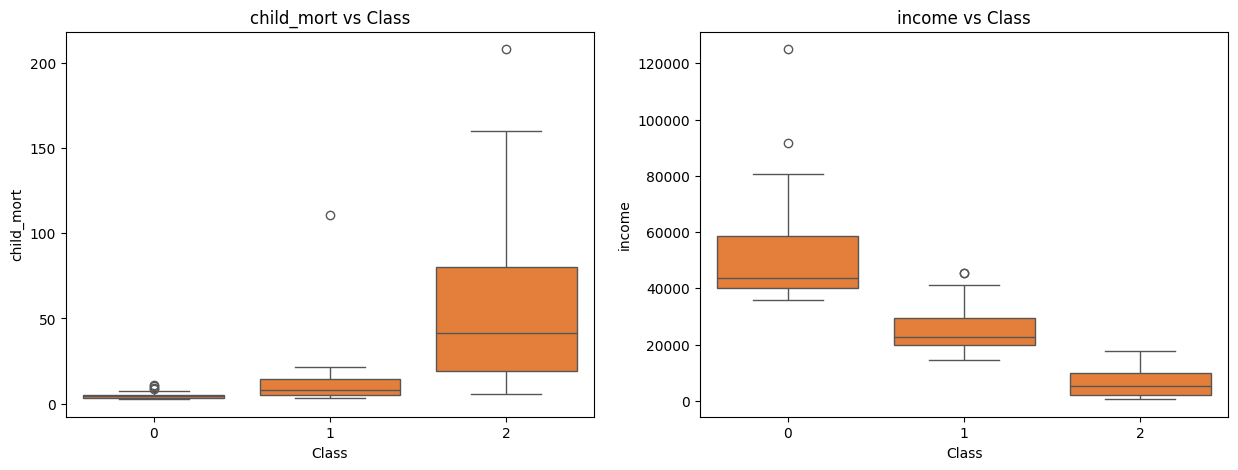

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- 0 : No needed help
- 1: might need help
- 2: needed help

In [ ]:
data['Class'] = pred_agc; df_labeled['Class'] = pred_agc

In [ ]:
df_labeled

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Help Needed,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Help Needed,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Help Needed,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Help Needed,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Might Need Help,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Help Needed,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Might Need Help,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Help Needed,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Help Needed,2


In [ ]:
df_labeled['Class'].loc[df_labeled['Class'] == 0] = 'No Help Needed'
df_labeled['Class'].loc[df_labeled['Class'] == 1] = 'Help Needed'
df_labeled['Class'].loc[df_labeled['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(df_labeled[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df_labeled['Class'],
                    color_discrete_map = {'Help Needed' : 'Red',
                                          'Might Need Help' : 'Yellow',
                                          'No Help Needed' : 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

# Kết luận

Qua bài thực hành trên ta thấy được sự phân cụm của 3 thuật toán k-mean, DBCSAN, và Hierarchical Clustering là hoàn toàn khác nhau do đặc điểm của thuật toán và ý nghĩa sử dụng của nó.

# Link tham khảo

[!LINK THAM KHẢO] https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical

[!LINK THAM KHẢO] https://phamdinhkhanh.github.io/deepai-book/ch_ml/index_HierarchicalClustering.html